In [127]:
# Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt

In [128]:
# Configurando o tamanho padrão dos gráficos

plt.rcParams['figure.figsize'] = (11,7)

In [221]:
# Carregando os dados necessarios

tabelas = ['STG_OPR_ITT', 'STG_MDL']
extensao = '.xlsx'

dados_STG_OPR_ITT = pd.read_excel(f'{tabelas[0]}{extensao}')
dados_STG_MDL = pd.read_excel(f'{tabelas[1]}{extensao}')

In [59]:
# Verificando os tipos dos dados inseridos

dados_STG_OPR_ITT.dtypes

ID_STG_OPR_ITT       int64
VLR_CTRD_CSC       float64
QTD_PCL              int64
VLR_SDO_DDR        float64
QTD_CLI_CAD_POS      int64
QTD_OPR              int64
ID_FNT_ITT           int64
ID_MDL              object
DES_TIP_PSS         object
DAT_RSS_FNT_ITT     object
DAT_INC_DBO         object
dtype: object

In [189]:
# Verificando os tipos dos dados inseridos

dados_STG_MDL.dtypes

ID_STG_MDL      int64
COD_MDL        object
DES_MDL        object
DAT_INC_DBO    object
dtype: object

In [190]:
nome_colunas = dados_STG_OPR_ITT.columns

linhas = dados_STG_OPR_ITT.shape[0]
colunas = dados_STG_OPR_ITT.shape[1]

print('-' * 60)

print(f'A tabela {tabelas[0]} tem {linhas} linhas e {colunas} colunas.')

print('-' * 60)

print('Contendo as colunas: ')
for indice, coluna in enumerate(nome_colunas): 
    print(f'{indice} - {coluna}')
    
print('-' * 60)

------------------------------------------------------------
A tabela STG_OPR_ITT tem 891 linhas e 11 colunas.
------------------------------------------------------------
Contendo as colunas: 
0 - ID_STG_OPR_ITT
1 - VLR_CTRD_CSC
2 - QTD_PCL
3 - VLR_SDO_DDR
4 - QTD_CLI_CAD_POS
5 - QTD_OPR
6 - ID_FNT_ITT
7 - ID_MDL
8 - DES_TIP_PSS
9 - DAT_RSS_FNT_ITT
10 - DAT_INC_DBO
------------------------------------------------------------


In [191]:
nome_colunas = dados_STG_MDL.columns

linhas = dados_STG_MDL.shape[0]
colunas = dados_STG_MDL.shape[1]

print('-' * 60)

print(f'A tabela {tabelas[1]} tem {linhas} linhas e {colunas} colunas.')

print('-' * 60)

print('Contendo as colunas: ')
for indice, coluna in enumerate(nome_colunas): 
    print(f'{indice} - {coluna}')
    
print('-' * 60)

------------------------------------------------------------
A tabela STG_MDL tem 19 linhas e 4 colunas.
------------------------------------------------------------
Contendo as colunas: 
0 - ID_STG_MDL
1 - COD_MDL
2 - DES_MDL
3 - DAT_INC_DBO
------------------------------------------------------------


In [103]:
# Convertendo todos os valores para acrescentar dois decimais

colunas = ['VLR_CTRD_CSC', 'VLR_SDO_DDR']

for coluna in colunas:
    count = 0
    print('-' * 60)
    
    for antes in dados_STG_OPR_ITT[coluna].dropna():
        depois = antes * 0.01
        dados_STG_OPR_ITT[coluna] = dados_STG_OPR_ITT[coluna].replace(antes, depois)

        if count < 10: # Essa parte serve somente para limitar a amostragem dos valores
            count += 1
            print(f'R${depois:>14.2f}')
            
    print('-' * 60)

------------------------------------------------------------
R$       2423.12
R$       8372.00
R$      45340.94
R$      83188.74
R$      16872.00
R$       3223.25
R$      57609.53
R$      52887.94
R$      49531.28
R$     670842.12
------------------------------------------------------------
------------------------------------------------------------
R$       1477.46
R$       6114.61
R$      34556.93
R$      38729.32
R$       4715.18
R$       1754.93
R$      30315.01
R$      24701.55
R$      24113.91
R$     593271.36
------------------------------------------------------------


In [223]:
print(dados_STG_OPR_ITT['ID_MDL'].head(10))

for index, value in enumerate(dados_STG_OPR_ITT['ID_MDL'].dropna()):
    temp = dados_STG_OPR_ITT['ID_MDL'][index]
    
    for index_temp, codigo in enumerate(dados_STG_MDL['COD_MDL']):

        if value == codigo:
            dados_STG_OPR_ITT['ID_MDL'][index] = temp.replace(temp, dados_STG_MDL['DES_MDL'][index_temp])
        
            
print(dados_STG_OPR_ITT['ID_MDL'].head(10))

0    A04
1    B99
2    B05
3    B03
4    B03
5    B99
6    C01
7    A04
8    B05
9    A01
Name: ID_MDL, dtype: object


/home/fatality/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0                    EMPRESTIMO - CREDITO PESSOAL
1                           OUTROS FINANCIAMENTOS
2    FINANCIAMENTO - AQUISICAO DE BENS (VEICULOS)
3                FINANCIAMENTO - IMOBILIARIOS SFH
4                FINANCIAMENTO - IMOBILIARIOS SFH
5                           OUTROS FINANCIAMENTOS
6                                       CONSORCIO
7                    EMPRESTIMO - CREDITO PESSOAL
8    FINANCIAMENTO - AQUISICAO DE BENS (VEICULOS)
9                         EMPRESTIMO - CONSIGNADO
Name: ID_MDL, dtype: object


In [235]:
# Total de operações por modalidades (mais usadas)

temp = dados_STG_OPR_ITT['ID_MDL'].dropna()

mdl_mais_usadas = temp.value_counts(ascending = False)
mdl_mais_usadas


FINANCIAMENTO - IMOBILIARIOS SFH                214
CONSORCIO                                       186
EMPRESTIMO - CONSIGNADO                         122
EMPRESTIMO - CREDITO PESSOAL                    112
OUTROS FINANCIAMENTOS                           104
FINANCIAMENTO - AQUISICAO DE BENS (VEICULOS)     71
OUTROS EMPRESTIMOS                               35
EMPRESTIMO - MICROCREDITO                        20
FINANCIAMENTO - RURAL E AGROINDUSTRIAL           19
FINANCIAMENTO - IMOBILIARIO (OUTROS)              4
FINANCIAMENTO - ARREENDAMENTO                     2
TITULOS DESCONTADOS                               1
AVAIS E FIANCASA HONRADOS                         1
Name: ID_MDL, dtype: int64

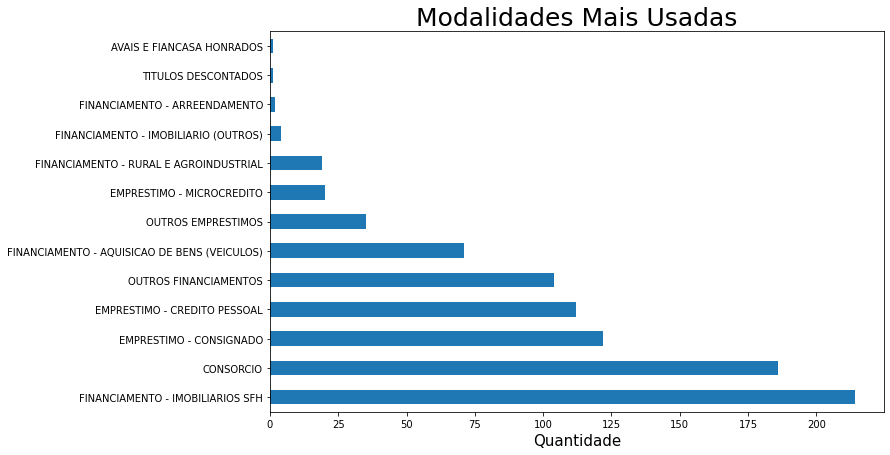

In [236]:
# Criando um gráfico para ficar mais visível.

mdl_mais_usadas.plot.barh();

plt.title("Modalidades Mais Usadas", size=25); # Adicionando um título
plt.xlabel('Quantidade', size=15); # Nomeando o eixo X
# plt.ylabel('Código', size=15); # Nomeando o eixo Y

In [65]:
# Soma das Operações por Modalidades.

temp = dados_STG_OPR_ITT[['ID_MDL', 'QTD_OPR']].dropna()

soma_opr_por_mdl = temp.groupby(['ID_MDL']).sum().sort_values(by = 'QTD_OPR', ascending = False)
soma_opr_por_mdl

,QTD_OPR
ID_MDL,
A04,411896
A01,181711
B99,115480
B05,30366
A99,15067
C01,12509
G01,11850
B03,4331
A05,1482


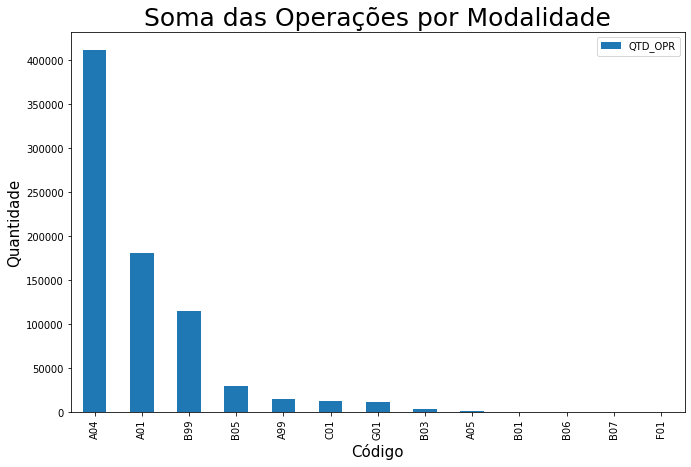

In [66]:
# Criando um grafico para ficar mais visivel

soma_opr_por_mdl.plot.bar()

plt.title("Soma das Operações por Modalidade", size=25); # Adicionando um título
plt.xlabel('Código', size=15); # Nomeando o eixo X
plt.ylabel('Quantidade', size=15); # Nomeando o eixo Y
plt.legend()

In [67]:
# Soma das Parcelas por Modalidades.

temp = dados_STG_OPR_ITT[['ID_MDL', 'QTD_PCL']].dropna()

soma_parcela_por_mdl = temp.groupby(['ID_MDL']).sum().sort_values(by = 'QTD_PCL', ascending = False)
soma_parcela_por_mdl

,QTD_PCL
ID_MDL,
B03,49467
C01,20139
A01,7563
A04,7447
B99,5522
B05,2583
A99,630
A05,287
B01,230


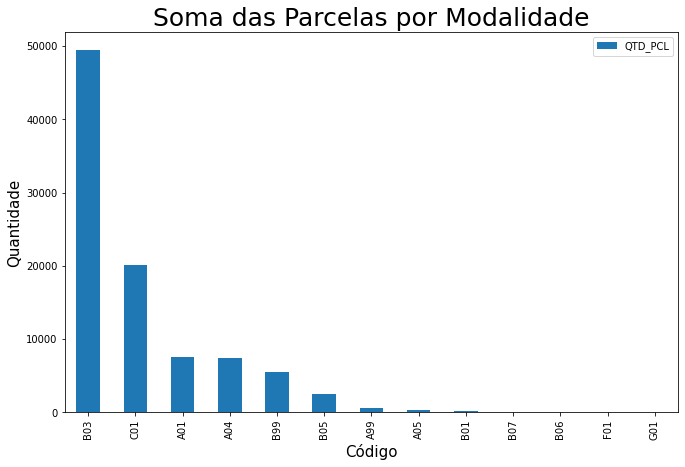

In [68]:
# Criando um grafico para ficar mais visivel

soma_parcela_por_mdl.plot.bar()

plt.title("Soma das Parcelas por Modalidade", size=25); # Adicionando um título
plt.xlabel('Código', size=15); # Nomeando o eixo X
plt.ylabel('Quantidade', size=15); # Nomeando o eixo Y